In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import math
import warnings
import joblib
warnings.filterwarnings("ignore")

In [2]:
! pip install eli5

     |████████████████████████████████| 106 kB 2.7 MB/s 


In [107]:
final_training_df = pd.read_csv(r'/content/drive/MyDrive/Research Paper/DATA/final_training_df.csv')
final_testing_df = pd.read_csv(r'/content/drive/MyDrive/Research Paper/DATA/final_testing_df.csv')

print(final_training_df.shape)
print(final_testing_df.shape)
print("The Datasets have been loaded...")

(250, 11)
(50, 11)
The Datasets have been loaded...


In [108]:
X_train = final_training_df.drop(['condition'], axis = 1)
Y_train = final_training_df['condition']

Y_train = np.array(Y_train)

X_test = final_testing_df.drop(['condition'], axis = 1)
Y_test = final_testing_df['condition']

Y_test = np.array(Y_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(250, 10) (250,)
(50, 10) (50,)


In [109]:
def plot_confusion_matrix(test_y, predict_y):

  from sklearn.metrics import confusion_matrix

  C = confusion_matrix(test_y, predict_y)
  
  print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100, '%')

 
  labels = [0,1,2,3,4,5]
  cmap=sns.light_palette("green")
  
  '''
  CONFUSION MATRIX
  '''
  print("-"*50, "Confusion matrix", "-"*50)
  plt.figure(figsize=(10,5))
  sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

# BEST SVM

Here, I am taking the results from Haris Hawks Optimizer

In [110]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel = 'rbf', C = 6.51794747, gamma = 0.06375978, verbose = 1)
clf.fit(X_train, Y_train)

test_predicted_output_best_model = clf.predict(X_test)
train_predicted_output_best_model = clf.predict(X_train)

testing_accuracy_best_model = accuracy_score(Y_test, test_predicted_output_best_model)
training_accuracy_best_model = accuracy_score(Y_train, train_predicted_output_best_model)

print("The TESTING ACCURACY IS:- ", testing_accuracy_best_model)
print('The TRAINING ACCURACY IS:- ', training_accuracy_best_model)

[LibSVM]The TESTING ACCURACY IS:-  0.9
The TRAINING ACCURACY IS:-  0.972


Number of misclassified points  2.8000000000000003 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


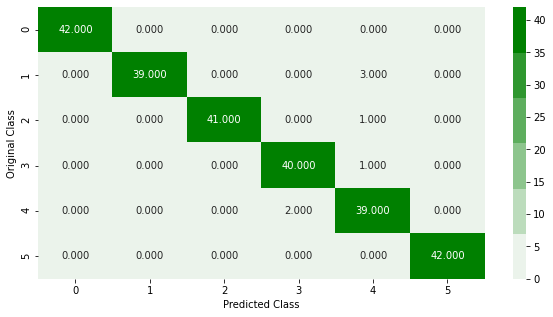

In [111]:
'''
FOR TRAINING DATA POINTS
'''
plot_confusion_matrix(Y_train, train_predicted_output_best_model)

Number of misclassified points  10.0 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


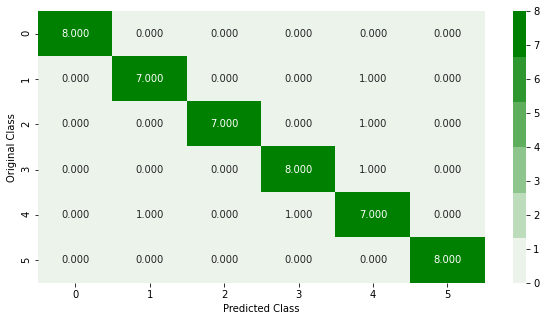

In [112]:
'''
FOR TESTING DATA POINTS
'''
plot_confusion_matrix(Y_test, test_predicted_output_best_model)

In [113]:
# to take the training and testing predicted datapoints and join it with the existing dataframes

final_training_df_best_model = final_training_df
final_testing_df_best_model = final_testing_df

final_training_df_best_model['SVM_output_best'] = train_predicted_output_best_model
final_testing_df_best_model['SVM_output_best'] = test_predicted_output_best_model

del final_training_df_best_model['condition']
del final_testing_df_best_model['condition']

print(final_training_df_best_model.shape, type(final_training_df_best_model))
print(final_testing_df_best_model.shape, type(final_testing_df_best_model))

(250, 11) <class 'pandas.core.frame.DataFrame'>
(50, 11) <class 'pandas.core.frame.DataFrame'>


In [114]:
final_training_df_best_model.head()

,Mean,SD,Kurtosis,sum,Skewness,max,min,range,RMS,Shape factor,SVM_output_best
0,-1.166491,-0.641888,-0.631950,-1.166651,0.326382,-0.407618,1.058829,-0.740012,0.033720,-0.413015,5
1,0.389329,0.830822,1.604929,0.389247,0.082017,1.090784,-1.204128,1.196487,0.744678,-0.432032,3
2,1.439655,-0.488640,0.576646,1.439758,1.949726,0.773832,0.418404,0.236606,0.108506,-0.619835,1
3,-0.641116,-0.718663,-0.972769,-0.641185,-0.538460,-1.190899,0.873037,-1.093864,-0.003179,-0.486737,5
4,0.658361,-0.764562,-0.388668,0.658378,-0.370158,-0.387232,-0.437583,-0.008617,-0.024884,-0.598013,1


In [115]:
'''
To extract the X and Y values and to train a decision tree classifier on the best model (HHO algorithm)
'''
X_train_best = final_training_df_best_model.drop('SVM_output_best', axis = 1)
X_test_best = final_testing_df_best_model.drop('SVM_output_best', axis = 1)

Y_train_best = final_training_df['SVM_output_best']
Y_test_best = final_testing_df['SVM_output_best']

print(X_train_best.shape, Y_train_best.shape)
print(X_test_best.shape, Y_test_best.shape)

(250, 10) (250,)
(50, 10) (50,)


In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT_clf_best = DecisionTreeClassifier(max_depth=6, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto')

DT_clf_best.fit(X_train_best, Y_train_best)

print("The Decision Tree classifier has been trained....")

DT_train_predicted_best = DT_clf_best.predict(X_train_best)
DT_test_predicted_best = DT_clf_best.predict(X_test_best)

training_accuracy_DT = accuracy_score(Y_train_best, DT_train_predicted_best)
testing_accuracy_DT = accuracy_score(Y_test_best, DT_test_predicted_best)

print("TRAINING ACCURACY IS:- ", training_accuracy_DT)
print("TESTING ACCURACY IS:- ", testing_accuracy_DT)

The Decision Tree classifier has been trained....
TRAINING ACCURACY IS:-  0.996
TESTING ACCURACY IS:-  0.92


In [123]:
# to save this model having this particular accuracy

file_path_to_save_model = r'/content/drive/MyDrive/Research Paper/DATA/SVM_DT_clf_best.joblib'

joblib.dump(DT_clf_best, file_path_to_save_model)

print("The Model has been stored...")

The Model has been stored...


In [127]:
# to load the stored classifier
SVM_DT_clf_best = joblib.load(r'/content/drive/MyDrive/Research Paper/DATA/SVM_DT_clf_best.joblib')

print(type(SVM_DT_clf_best))
print("The Model has been loaded....")

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
The Model has been loaded....


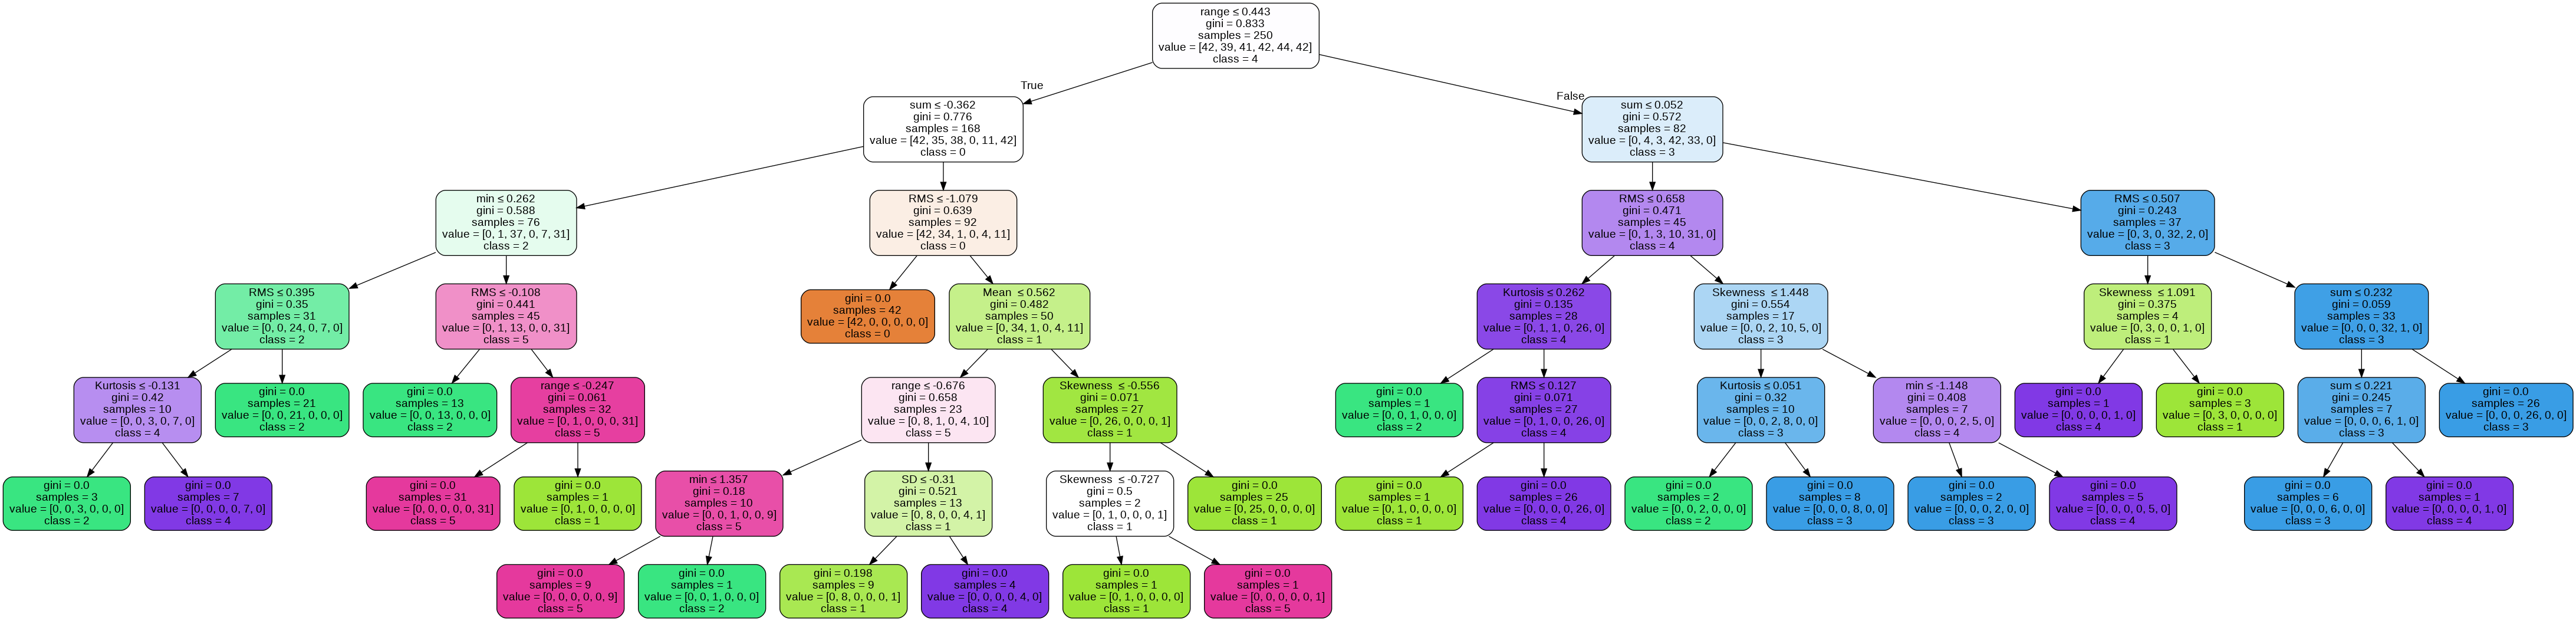

In [128]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

feature_columns = ['Mean ', 'SD', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor']

dot_data = StringIO()
export_graphviz(SVM_DT_clf_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_columns ,class_names=['0','1', '2', '3', '4', '5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Explainable AI Best Model Decision Tree.png')
Image(graph.create_png())

In [129]:
import eli5

eli5.show_weights(SVM_DT_clf_best, feature_names = feature_columns)

Weight,Feature
0.3616,RMS
0.2209,sum
0.1912,range
0.0902,min
0.0448,Kurtosis
0.0342,Mean
0.0328,Skewness
0.0242,SD
0,Shape factor
0,max


In [130]:
import eli5

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(SVM_DT_clf_best, random_state=1).fit(X_test_best, Y_test_best)
eli5.show_weights(perm, feature_names = feature_columns)

Weight,Feature
0.4400 ± 0.0716,RMS
0.3720 ± 0.0742,range
0.2440 ± 0.1588,sum
0.1520 ± 0.0543,Kurtosis
0.1200 ± 0.0438,min
0.0160 ± 0.0299,SD
0 ± 0.0000,Shape factor
0 ± 0.0000,max
0 ± 0.0000,Mean
-0.0080 ± 0.0408,Skewness


In [131]:
# correctly classified datapoint
eli5.show_prediction(SVM_DT_clf_best, X_test_best.iloc[0], show_feature_values = True, feature_names = feature_columns)

In [132]:
# incorrectly classified datapoint
eli5.show_prediction(SVM_DT_clf_best, X_test_best.iloc[20], show_feature_values = True, feature_names = feature_columns)

In [133]:
'''
I am taking this datapoint as it is correctly classified by Best Model (which is Harris Hawks)
'''
eli5.show_prediction(SVM_DT_clf_best, X_test_best.iloc[48], show_feature_values = True, feature_names = feature_columns)

# SIMPLE SVM WITH LINEAR KERNEL

In [134]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

simple_clf = SVC(kernel = 'linear', verbose = 1)
simple_clf.fit(X_train, Y_train)

test_predicted_output_simple = simple_clf.predict(X_test)
train_predicted_output_simple = simple_clf.predict(X_train)

testing_accuracy = accuracy_score(Y_test, test_predicted_output_simple)
training_accuracy = accuracy_score(Y_train, train_predicted_output_simple)

print("The TESTING ACCURACY IS:- ", testing_accuracy)
print('The TRAINING ACCURACY IS:- ', training_accuracy)

[LibSVM]The TESTING ACCURACY IS:-  0.88
The TRAINING ACCURACY IS:-  0.964


Number of misclassified points  3.5999999999999996 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


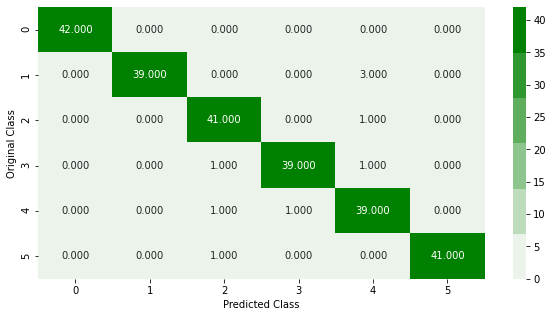

In [135]:
'''
FOR TRAINING DATA POINTS
'''
plot_confusion_matrix(Y_train, train_predicted_output_simple)

Number of misclassified points  12.0 %
-------------------------------------------------- Confusion matrix --------------------------------------------------


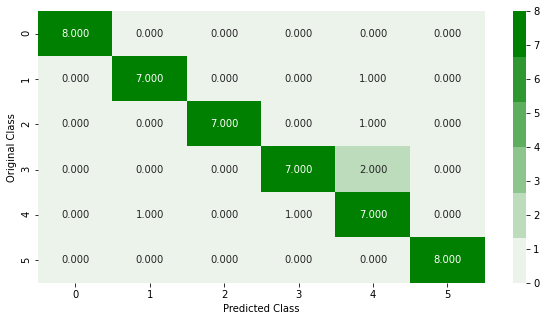

In [136]:
'''
FOR TESTING DATA POINTS
'''
plot_confusion_matrix(Y_test, test_predicted_output_simple)

In [137]:
final_training_df.head()

,Mean,SD,Kurtosis,sum,Skewness,max,min,range,RMS,Shape factor,SVM_output_best
0,-1.166491,-0.641888,-0.631950,-1.166651,0.326382,-0.407618,1.058829,-0.740012,0.033720,-0.413015,5
1,0.389329,0.830822,1.604929,0.389247,0.082017,1.090784,-1.204128,1.196487,0.744678,-0.432032,3
2,1.439655,-0.488640,0.576646,1.439758,1.949726,0.773832,0.418404,0.236606,0.108506,-0.619835,1
3,-0.641116,-0.718663,-0.972769,-0.641185,-0.538460,-1.190899,0.873037,-1.093864,-0.003179,-0.486737,5
4,0.658361,-0.764562,-0.388668,0.658378,-0.370158,-0.387232,-0.437583,-0.008617,-0.024884,-0.598013,1


In [138]:
# to take the training and testing predicted datapoints and join it with the existing dataframes for the SIMPLE CLASSIFIER

final_training_df_simple_model = final_training_df
final_testing_df_simple_model = final_testing_df

final_training_df_simple_model['SVM_output_simple'] = train_predicted_output_simple
final_testing_df_simple_model['SVM_output_simple'] = test_predicted_output_simple

del final_training_df_simple_model['SVM_output_best']
del final_testing_df_simple_model['SVM_output_best']

print(final_training_df_simple_model.shape, type(final_training_df_simple_model))
print(final_testing_df_simple_model.shape, type(final_testing_df_simple_model))

(250, 11) <class 'pandas.core.frame.DataFrame'>
(50, 11) <class 'pandas.core.frame.DataFrame'>


In [139]:
final_training_df_simple_model.head()

,Mean,SD,Kurtosis,sum,Skewness,max,min,range,RMS,Shape factor,SVM_output_simple
0,-1.166491,-0.641888,-0.631950,-1.166651,0.326382,-0.407618,1.058829,-0.740012,0.033720,-0.413015,5
1,0.389329,0.830822,1.604929,0.389247,0.082017,1.090784,-1.204128,1.196487,0.744678,-0.432032,3
2,1.439655,-0.488640,0.576646,1.439758,1.949726,0.773832,0.418404,0.236606,0.108506,-0.619835,1
3,-0.641116,-0.718663,-0.972769,-0.641185,-0.538460,-1.190899,0.873037,-1.093864,-0.003179,-0.486737,5
4,0.658361,-0.764562,-0.388668,0.658378,-0.370158,-0.387232,-0.437583,-0.008617,-0.024884,-0.598013,1


In [140]:
X_train_simple = final_training_df_simple_model.drop('SVM_output_simple', axis = 1)
X_test_simple = final_testing_df_simple_model.drop('SVM_output_simple', axis = 1)

Y_train_simple = final_training_df_simple_model['SVM_output_simple']
Y_test_simple = final_testing_df_simple_model['SVM_output_simple']

print(X_train_simple.shape, Y_train_simple.shape)
print(X_test_simple.shape, Y_test_simple.shape)

(250, 10) (250,)
(50, 10) (50,)


In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT_clf_simple = DecisionTreeClassifier(max_depth=6, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto')

DT_clf_simple.fit(X_train_simple, Y_train_simple)

print("The Decision Tree classifier has been trained....")

DT_train_predicted_simple = DT_clf_simple.predict(X_train_simple)
DT_test_predicted_simple = DT_clf_simple.predict(X_test_simple)

training_accuracy_DT = accuracy_score(Y_train_simple, DT_train_predicted_simple)
testing_accuracy_DT = accuracy_score(Y_test_simple, DT_test_predicted_simple)

print("TRAINING ACCURACY IS:- ", training_accuracy_DT)
print("TESTING ACCURACY IS:- ", testing_accuracy_DT)

The Decision Tree classifier has been trained....
TRAINING ACCURACY IS:-  0.988
TESTING ACCURACY IS:-  0.92


In [147]:
# to save this model having this particular accuracy

file_path_to_save_model = r'/content/drive/MyDrive/Research Paper/DATA/SVM_DT_clf_simple.joblib'

joblib.dump(DT_clf_simple, file_path_to_save_model)

print("The Model has been stored...")

The Model has been stored...


In [148]:
# to load the stored classifier
SVM_DT_clf_simple = joblib.load(r'/content/drive/MyDrive/Research Paper/DATA/SVM_DT_clf_simple.joblib')

print(type(DT_clf_simple))
print("The Model has been loaded....")

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
The Model has been loaded....


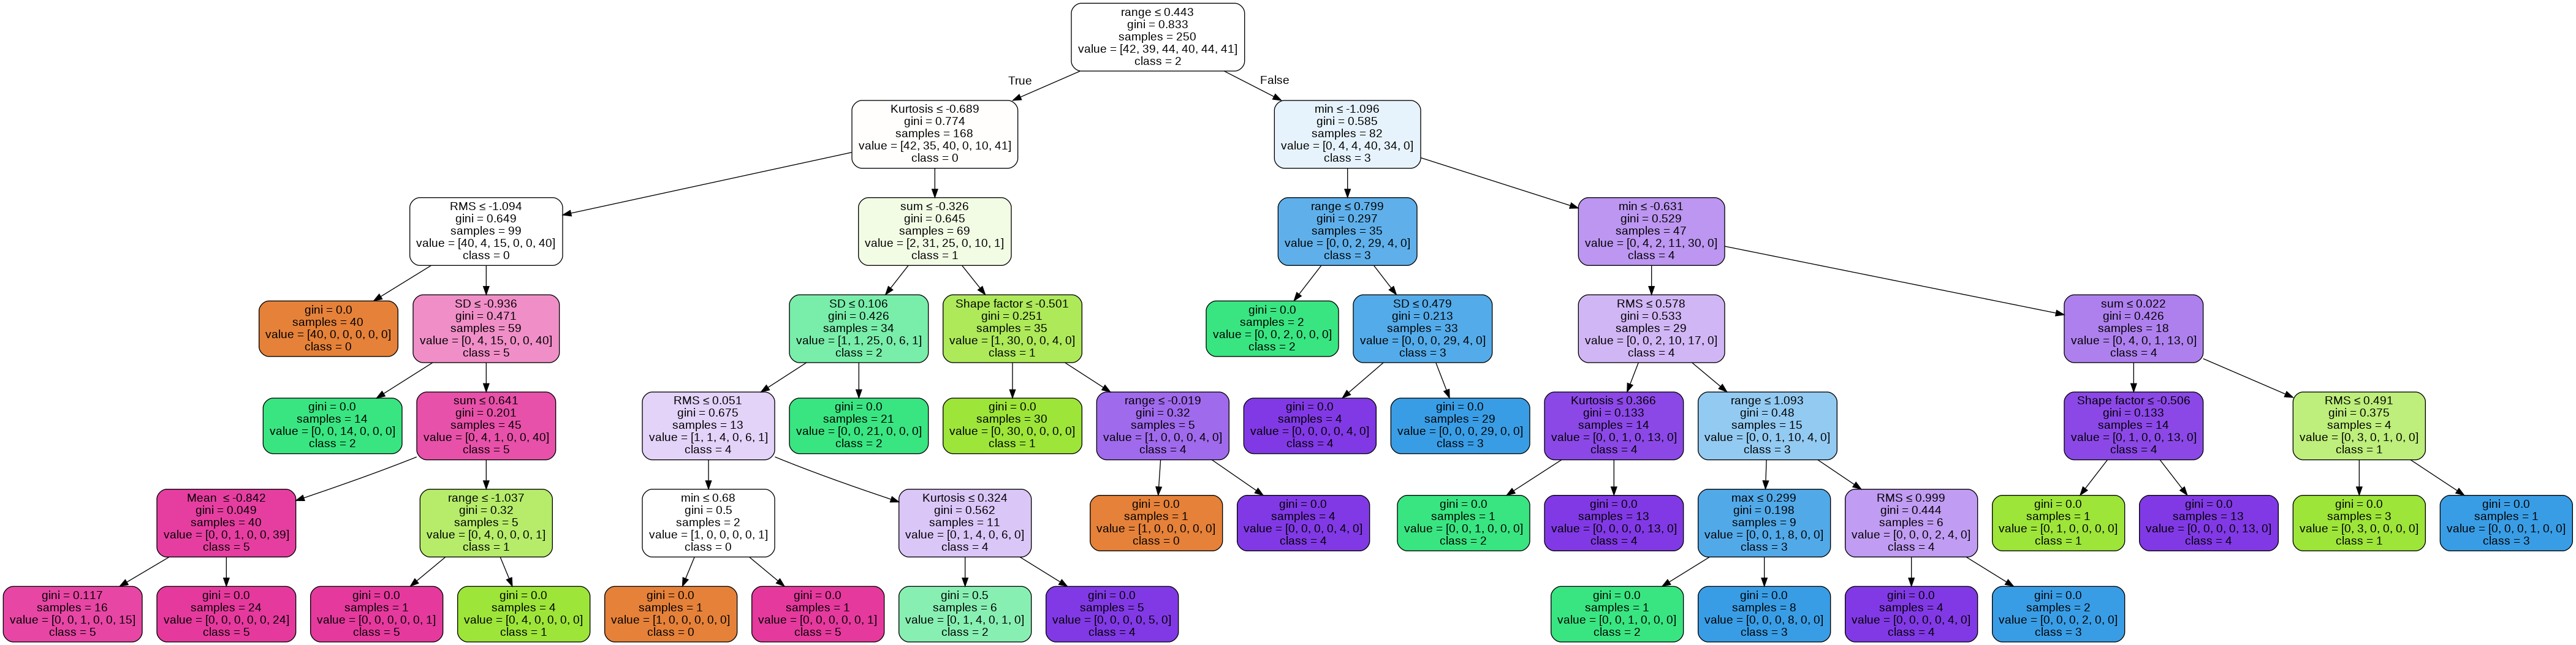

In [149]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

feature_columns = ['Mean ', 'SD', 'Kurtosis', 'sum', 'Skewness ', 'max', 'min', 'range', 'RMS', 'Shape factor']

dot_data = StringIO()
export_graphviz(SVM_DT_clf_simple, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_columns ,class_names=['0','1', '2', '3', '4', '5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Explainable AI Simple Model Decision Tree.png')
Image(graph.create_png())

In [150]:
import eli5

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(SVM_DT_clf_simple, random_state=1).fit(X_test_simple, Y_test_simple)
eli5.show_weights(perm, feature_names = feature_columns)

Weight,Feature
0.4040 ± 0.1197,range
0.1840 ± 0.0588,RMS
0.1600 ± 0.0669,Kurtosis
0.1520 ± 0.1255,sum
0.1320 ± 0.0408,SD
0.1000 ± 0.0669,Shape factor
0.1000 ± 0.0912,min
0.0280 ± 0.0196,max
0 ± 0.0000,Skewness
0 ± 0.0000,Mean


In [151]:
# correctly classified datapoint
eli5.show_prediction(SVM_DT_clf_simple, X_test_simple.iloc[0], show_feature_values = True, feature_names = feature_columns)

In [152]:
# correctly classified datapoint

eli5.show_prediction(SVM_DT_clf_simple, X_test_simple.iloc[2], show_feature_values = True, feature_names = feature_columns)

In [153]:
'''
I am taking this data point as it is incorrectly classified by the Simple SVM classifier and has been correctly classified by the optimized classifier
'''
eli5.show_prediction(SVM_DT_clf_simple, X_test_simple.iloc[48], show_feature_values = True, feature_names = feature_columns)

In [104]:
'''
to create a for loop to classify each testting data point and extract data points which are misclassified for SIMPLE SVM
'''

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def extracting_mis_classified_data_points(X_train, X_test, Y_train, Y_test, decision_tree_classifier):

  # a list to store the index number of misclassified test points
  misclassified_test_points = []

  # to store the original class of the misclassified datapoint
  original_class_test = []

  # to store the predicted class of the mislassified datapoint
  predicted_class_test = []
  
  X_train = X_train.reset_index(drop = True)
  X_test = X_test.reset_index(drop = True)


  # first to train the SVC which has the optimized parameters
  
  #model = SVC(kernel = 'linear', verbose = 1)
  #model.fit(X_train, Y_train)



  # now to take the trained model and pass the test data points one by one and extract the mis-classified datapoints
  for i in range(len(X_test)):

    current_datapoint = X_test.iloc[i]
    current_datapoint = np.array(current_datapoint)
    current_datapoint = current_datapoint.reshape(1,-1)

    # to predict the class label for the current datapoint
    predicted_datapoint = decision_tree_classifier.predict(current_datapoint)


    # here the testing datapoint has been correctly classified
    if predicted_datapoint[0] == Y_test[i]:
      continue;

    # here the testing datapoint has been miscorrectly classified
    else:
      misclassified_test_points.append(i)
      original_class_test.append(Y_test[i])
      predicted_class_test.append(predicted_datapoint[0])


  return misclassified_test_points, original_class_test, predicted_class_test

In [105]:
'''
to check the points that are misclassified by the Decision Tree classifier
'''
misclassified_test_points_index_values, original_class_test, predicted_class_test = extracting_mis_classified_data_points(X_train, X_test, Y_train, Y_test, DT_clf_simple)

print(misclassified_test_points_index_values)
print("ORIGINAL CLASSES:- ", original_class_test)
print("PREDICTED CLASSES:- ", predicted_class_test)

[12, 20, 24, 31, 43, 49]
ORIGINAL CLASSES:-  [1, 3, 3, 4, 1, 4]
PREDICTED CLASSES:-  [4, 4, 4, 3, 4, 1]
